In [1]:
include("simu_utils.jl")
using Distributions    # to draw from uniform
using JLD2    # for data sl

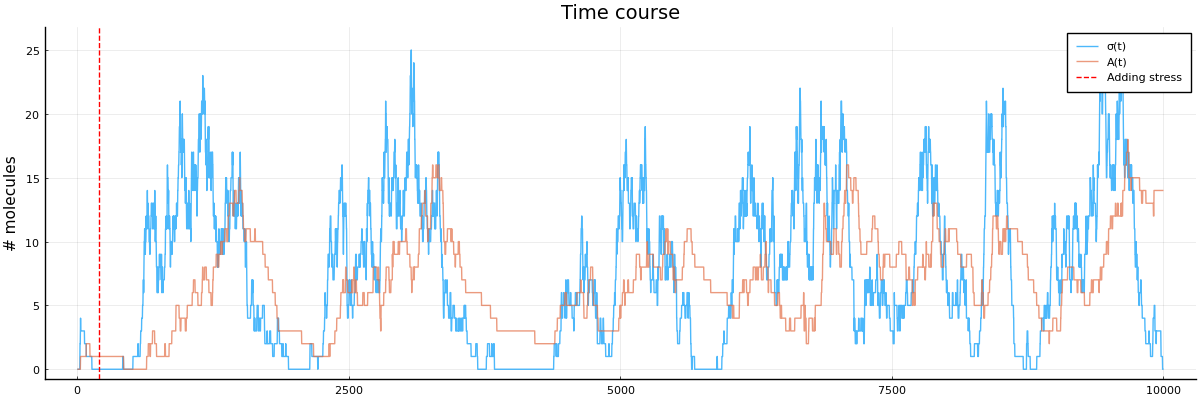

KD/KS = 0.5; KS = 30.0; τ₂/τ₁ = 5.0; β= 50.0; n = 1.0

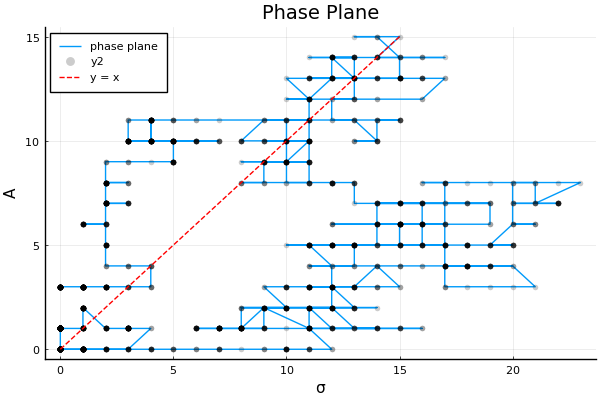

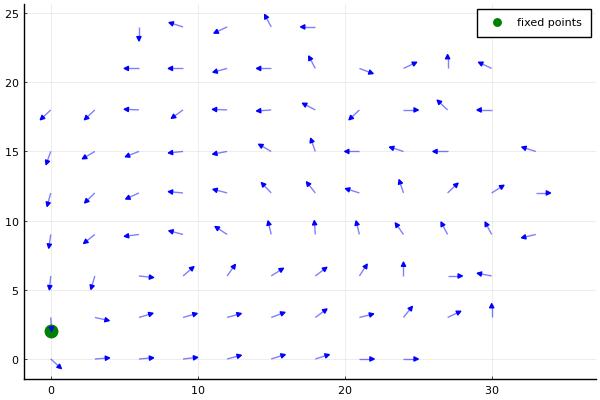

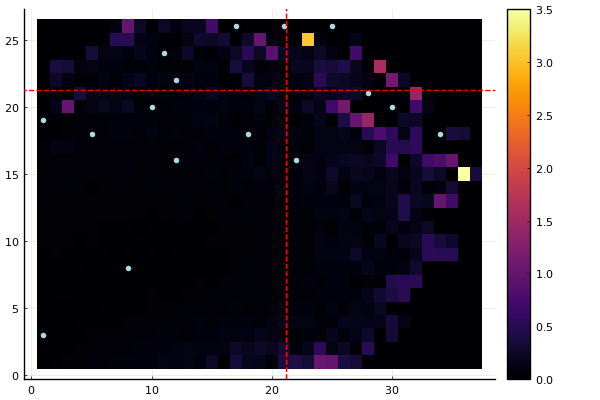

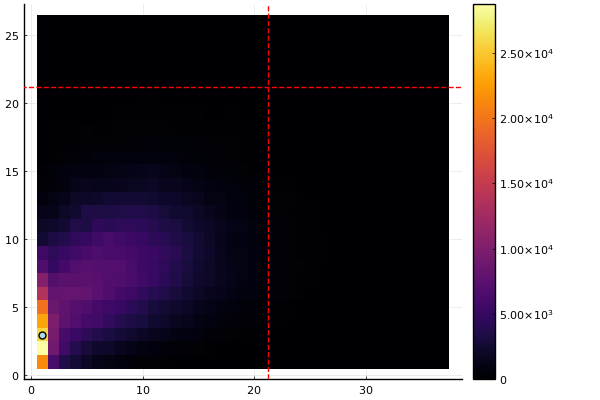

# fp: 1, # fp below noise level: 1, # fp above noise level: 0, has reverse flow: true, has forward flow: true
The dynamical behaviour is: stochastic_pulsing

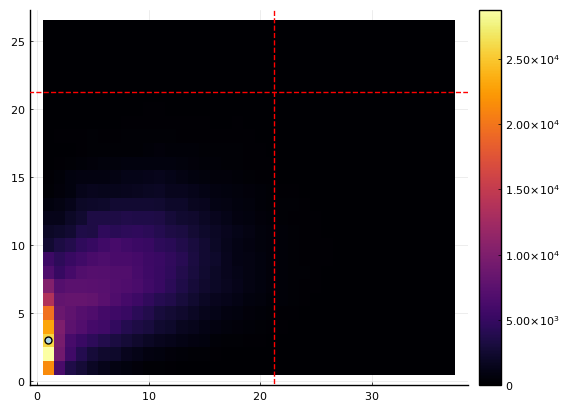


Resonance magnitude to neighbour ratio in the Fourier space is: 94.86414309726378


In [21]:
# gr()    # the default backend has bad quiver plot, and pyplot has the plot duplication bug
pyplot()
# parameters for the simulation
timescale = 50.0
timespan = 1e6
stress_t = 200.0
dt = 1.0
rτ = 5.0
β = 50.0
n = 1.0

# model
sigma_model = reaction_system()

# parameters to inspect
# KS = exp(rand(Uniform(-5.0, 5.0)))
# rK = exp(rand(Uniform(-5.0, 5.0)))
# rK = exp.(range(-5.0, stop = 5.0, length = 20))[8]
# KS = exp.(range(-5.0, stop = 5.0, length = 20))[4]
KS = 30.0
rK = 0.5

# simulation
# there was a bug in julia 1.5 that the jump process simulation
# freezes when the timespan is long (1e6 to 1e7 iters)
sol = simu_all(
    sigma_model, 
    _KS = KS, 
    _rK = rK,
    _β = β, 
    _τ₁ = timescale, 
    _rτ = rτ, 
    _n = n,
    method = "ssa",
    show_hill = false,
    max_t = timespan,
    plot_max_t = 1e4,
    saveat = dt)

# classfication
regime = classify_by_timetraj(
    sol, stress_t, dt, β, n, 
    thres_v = 0.0015, fluc_f = 2, 
    show_vf_plot = true, show_v_heatmap = true, show_p_heatmap = true, quiet = false)

# fourier transform
res_ratio, ~, ~ = ft_analysis(sol, stress_t, dt)
println("Resonance magnitude to neighbour ratio in the Fourier space is: ", res_ratio)


## example julia data save and load by JLD2

In [5]:
# parameters for the simulation
timescale = 5.0
timespan = 2e6
stress_t = 200.0
dt = 1.0
rτ = 5.0
β = 100.0
n = 3.0
df_name = "SD_ssa_n3_b100_rt5"

# model
sigma_model = reaction_system()

# parameters to inspect
KS = exp.(range(-5.0, stop = 5.0, length = 50))
rK = exp.(range(-5.0, stop = 5.0, length = 50))

# initialize
behaviors = Array{Symbol, 2}(undef, length(rK), length(KS))

for i = 41:length(rK)
    for j = 1:length(KS)
        quiet = true    # control (decrease) the output
        no = (i - 1) * length(KS) + j
        if mod(no, 10) == 1
            println("# ", no)
            quiet = false
        end
        
        # simulation
        # there was a bug in julia 1.5 that the jump process simulation
        # freezes when the timespan is long (1e6 to 1e7 iters)
        sol = simu_all(
            sigma_model, 
            _KS = KS[j], 
            _rK = rK[i],
            _β = β, 
            _τ₁ = timescale, 
            _rτ = rτ, 
            _n = n,
            method = "ssa",
            show_hill = false,
            show_tc = false,
            show_pp = false,
            max_t = timespan,
            saveat = dt,
            quiet = quiet)
        
        # classification
        regime = classify_by_timetraj(
            sol, stress_t, dt, β, n, 
            thres_v = 0.002, fluc_f = 3, fluc_fp = 2, 
            thres_d = 1e-4, thres_f = 1e-7,
            quiet = quiet)
        
        behaviors[i, j] = regime
        
        # save data every 1000 iters
        if mod(no, 1000) == 0
            save(df_name * ".jld2", Dict("behaviors" => behaviors))
            println("### behaviors saved to file after ", no, " iters ###")
        end
    end
end

# 2001
KD/KS = 23.64768693463453; KS = 0.006737946999085467; τ₂/τ₁ = 5.0; β= 100.0; n = 3.0
# fp: 1, # fp below noise level: 0, # fp above noise level: 1, has reverse flow: false, has forward flow: false
The dynamical behaviour is: homo_activation
# 2011
KD/KS = 23.64768693463453; KS = 0.05186123560007898; τ₂/τ₁ = 5.0; β= 100.0; n = 3.0
# fp: 1, # fp below noise level: 0, # fp above noise level: 1, has reverse flow: false, has forward flow: true
The dynamical behaviour is: homo_activation
# 2021
KD/KS = 23.64768693463453; KS = 0.3991702158434836; τ₂/τ₁ = 5.0; β= 100.0; n = 3.0
# fp: 1, # fp below noise level: 0, # fp above noise level: 1, has reverse flow: false, has forward flow: false
The dynamical behaviour is: homo_activation
# 2031
KD/KS = 23.64768693463453; KS = 3.072369166929194; τ₂/τ₁ = 5.0; β= 100.0; n = 3.0
# fp: 1, # fp below noise level: 0, # fp above noise level: 1, has reverse flow: false, has forward flow: false
The dynamical behaviour is: homo_activation
# 2041
KD/KS = 

# fp: 1, # fp below noise level: 0, # fp above noise level: 1, has reverse flow: false, has forward flow: false
The dynamical behaviour is: homo_activation
# 2341
KD/KS = 80.45959251290459; KS = 23.64768693463453; τ₂/τ₁ = 5.0; β= 100.0; n = 3.0
# fp: 2, # fp below noise level: 1, # fp above noise level: 1, has reverse flow: false, has forward flow: false
The dynamical behaviour is: het_activation
# 2351
KD/KS = 98.67550454086953; KS = 0.006737946999085467; τ₂/τ₁ = 5.0; β= 100.0; n = 3.0
# fp: 1, # fp below noise level: 0, # fp above noise level: 1, has reverse flow: false, has forward flow: false
The dynamical behaviour is: homo_activation
# 2361
KD/KS = 98.67550454086953; KS = 0.05186123560007898; τ₂/τ₁ = 5.0; β= 100.0; n = 3.0
# fp: 1, # fp below noise level: 0, # fp above noise level: 1, has reverse flow: false, has forward flow: false
The dynamical behaviour is: homo_activation
# 2371
KD/KS = 98.67550454086953; KS = 0.3991702158434836; τ₂/τ₁ = 5.0; β= 100.0; n = 3.0
# fp: 1, # fp b

In [6]:
new_behaviors = deepcopy(behaviors)
old_behaviors = load(df_name*"_to2000.jld2", "behaviors")
behaviors[1:40, :] .= old_behaviors[1:40, :];

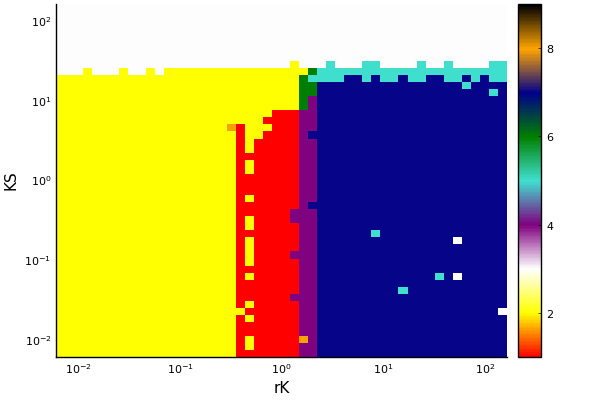

In [7]:
num_behaviors = zeros(Int64, size(behaviors)...)

sym2num = Dict(:oscillation => 1, :stochastic_pulsing => 2, :no_expression => 3,
    :stochastic_anti_pulsing => 4, :het_activation => 5, :stochastic_switching => 6,
    :homo_activation => 7, :irregular_oscillation => 8, :undefined => 9)
color_grad = cgrad([:red, :yellow, :white, :purple, 
        :turquoise, :green, :darkblue, :orange, :black], categorical = true)

for i = 1:size(behaviors, 1)
    for j = 1:size(behaviors, 2)
        num_behaviors[i, j] = sym2num[behaviors[i, j]]
    end
end

pyplot()
heatmap(rK, KS, num_behaviors', c = color_grad, xaxis = :log, yaxis = :log,
    xlabel = "rK", ylabel = "KS", clim = (1, 9))    # assign the min/max since undefined is hardly encountered

In [8]:
# save to pdf
savefig(df_name * ".pdf")

### Settings for different scenarios

Classical setup:
thres_v = 0.03, thres_d = 1e-4, thres_f = 1e-7, fluc_f = fluc_fp = 3, thres_ft = 50

no ultrasensitivity (n = 1):
thres_v = 0.03, fluc_f = 3, fluc_fp = 1

Short lifetime ($r\tau = 0.2$, timescale = 25) for $A$:
thres_v = 0.002, fluc_f = 3, fluc_fp = 1, thres_d = 1e-4, thres_f = 1e-7,

## Detect oscillation by FFT

In [68]:
function ft_analysis(sol, stress_t; show_plot = false)
    max_t = 1e4    # constant, the range for analysis
    
    # interpret the solution
    t, σ, ~ = interpret_sol(sol)
    
    # truncate
    σ = σ[stress_t .< t .< max_t]
    t = range(0.0, stop = (length(σ) - 1) * dt, length = length(σ))

    # fourier transform
    F = fft(σ) |> fftshift
    freqs = fftfreq(length(t), 1.0/dt) |> fftshift

    # plot
    if show_plot
        display(plot(freqs, abs.(F), xlim=(-0.5, 0.5)))
    end
    
    # resonance to neighbour ratio
    pos_freqs = freqs[freqs .> 1e-3]
    pos_mag = abs.(F)[freqs .> 1e-3]
    df = (maximum(freqs) - minimum(freqs)) / (length(freqs) - 1)
    # ratio of resonance magnitude to its neighbour
    which_max = argmax(pos_mag)
    next_val = pos_mag[which_max + Int64(round(0.1 / df))]
    res_ratio = maximum(pos_mag) / next_val
    max_freq = pos_freqs[which_max]
#     println("max ", maximum(pos_mag), " next ", next_val, " interval ", Int64(round(0.01 / df)))

    # return
    return res_ratio, F, freqs
end

res_ratio, ~, ~ = ft_analysis(sol, stress_t, show_plot = true)

ft_analysis (generic function with 2 methods)